<a href="https://colab.research.google.com/github/Ayxux/NLP_Minor_Project/blob/main/Notebook/fake_news_nlp-pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Ayxux/NLP_Minor_Project

Cloning into 'NLP_Minor_Project'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 98 (delta 36), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (98/98), 116.56 KiB | 897.00 KiB/s, done.
Resolving deltas: 100% (36/36), done.


In [2]:
%cd /content/NLP_Minor_Project/

!pip install -r REQUIREMENTS.txt



/content/NLP_Minor_Project
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 5.0 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement wordcloud==1.8.2 (from versions: 1.0.0, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.2, 1.2.1, 1.3, 1.3.1, 1.4, 1.4.1, 1.5.0, 1.6.0, 1.7.0, 1.8.0, 1.8.1, 1.8.2.2, 1.9.1.1, 1.9.2, 1.9.3, 1.9.4)
ERROR: No matching distribution found for wordcloud==1.8.2


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/data/fake_news

/content/drive/MyDrive/data/fake_news


In [6]:
import os
os.listdir('/content/drive/MyDrive/data/fake_news')


['test.csv', 'train.csv', 'submit.csv', 'NLP_Minor_Project']

## **Reading the train data**

In [8]:
import pandas as pd
# Load the datasets
train_path = '/content/drive/MyDrive/data/fake_news/train.csv'
test_path = '/content/drive/MyDrive/data/fake_news/test.csv'
submit_path = '/content/drive/MyDrive/data/fake_news/submit.csv'

# Read the CSV files
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
submit_df = pd.read_csv(submit_path)

# Check the first few rows of the train dataset
train_df.head()


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


## **EDA + Data pre-processing** (cleanup, tokenization, stopword removal, lemmatization and vectorization)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---

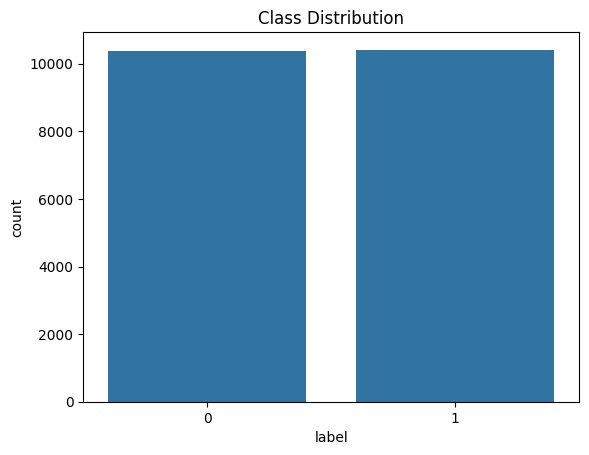

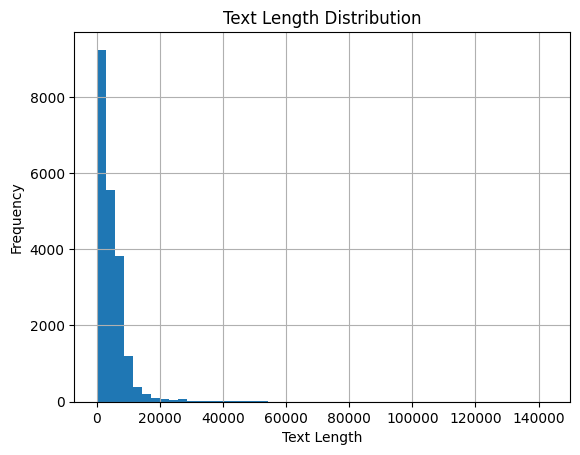

<ipython-input-13-0b46e0823874>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["text"].fillna("", inplace=True)


KeyboardInterrupt: 

In [13]:
# 1. Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import spacy

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

nlp = spacy.load("en_core_web_sm")

# 2. Loading dataset
file_path = "/content/drive/MyDrive/data/fake_news/train.csv"
df = pd.read_csv(file_path)

# 3. EDA
print(df.head())
print(df.info())
print(df.isnull().sum())

# Class Distribution
sns.countplot(x=df['label'])
plt.title("Class Distribution")
plt.show()

# 4. Text Length Distribution
df['text_length'] = df['text'].apply(lambda x: len(str(x)))
df['text_length'].hist(bins=50)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# 5. Optimized Text Preprocessing
def preprocess_text_spacy(texts):
    processed_texts = []
    for doc in nlp.pipe(texts.dropna(), disable=["ner", "parser"]):  # Drop NaN values before processing
        tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
        processed_texts.append(" ".join(tokens))
    return processed_texts

# Handle NaN by replacing them with empty strings
df["text"].fillna("", inplace=True)

# Apply preprocessing on cleaned text
df["clean_text"] = preprocess_text_spacy(df["text"])

# 6. Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = vectorizer.fit_transform(df['clean_text'])

print("TF-IDF Vectorized Shape:", X_tfidf.shape)


# **1. Logistic Regression Model**
##  **Training the model**

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)

# Initialize Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)

# Train the model
log_reg_model.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg_model.predict(X_test)


NameError: name 'X_tfidf' is not defined

# **Evaluating the model**
## **Classification by confusion matrix**

Logistic Regression - Accuracy: 0.9466
Logistic Regression - Precision: 0.9401
Logistic Regression - Recall: 0.9512
Logistic Regression - F1-Score: 0.9456


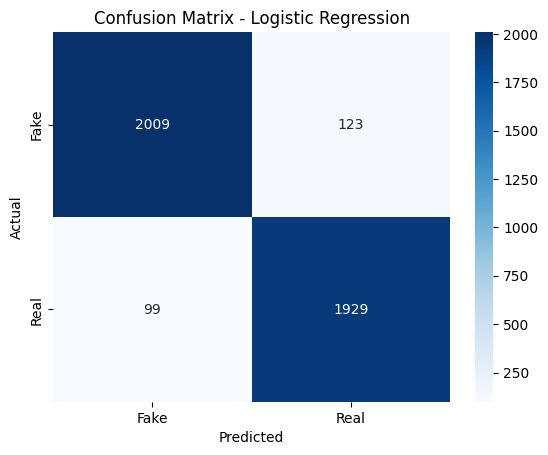

In [21]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_log_reg)
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1 = f1_score(y_test, y_pred_log_reg)

# Print Evaluation Metrics
print(f"Logistic Regression - Accuracy: {accuracy:.4f}")
print(f"Logistic Regression - Precision: {precision:.4f}")
print(f"Logistic Regression - Recall: {recall:.4f}")
print(f"Logistic Regression - F1-Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **1. Naive Bayes Model**
##  **Training the model**

In [22]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)


# **Evaluating the model**
## **Classification by confusion matrix**

Naive Bayes - Accuracy: 0.9067
Naive Bayes - Precision: 0.9343
Naive Bayes - Recall: 0.8698
Naive Bayes - F1-Score: 0.9009


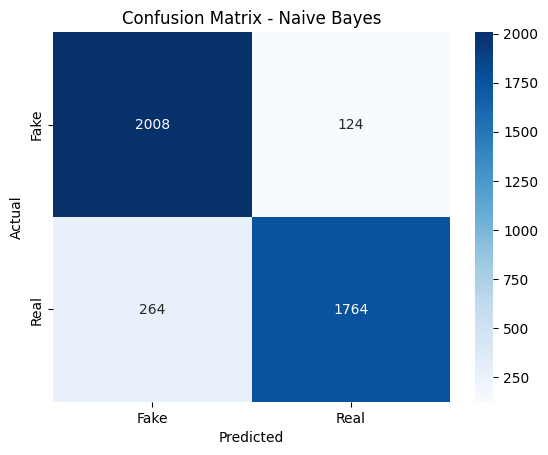

In [23]:
# Evaluate model performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Print Evaluation Metrics
print(f"Naive Bayes - Accuracy: {accuracy_nb:.4f}")
print(f"Naive Bayes - Precision: {precision_nb:.4f}")
print(f"Naive Bayes - Recall: {recall_nb:.4f}")
print(f"Naive Bayes - F1-Score: {f1_nb:.4f}")

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **Model Comparison between Logistic Regression and Naive Bayes**

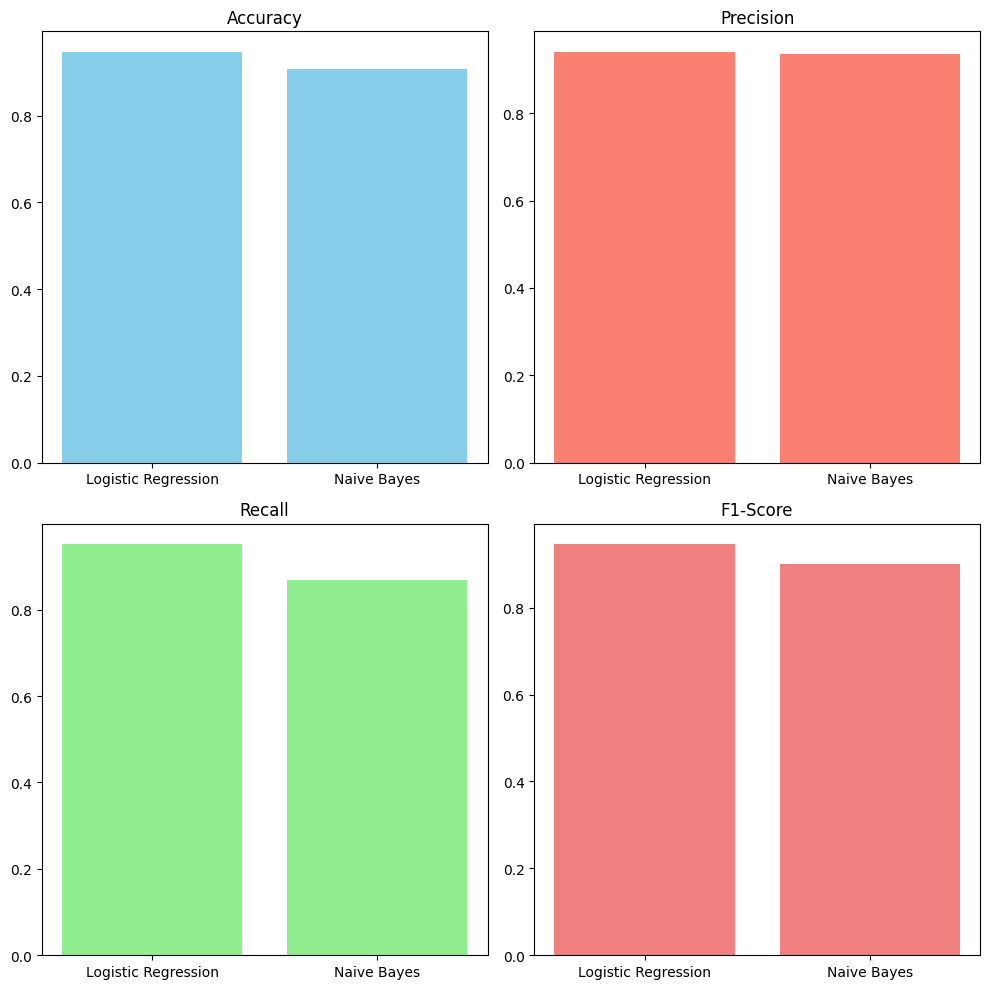

In [24]:
import numpy as np

# Model Performance Metrics
models = ['Logistic Regression', 'Naive Bayes']
accuracy_scores = [accuracy, accuracy_nb]
precision_scores = [precision, precision_nb]
recall_scores = [recall, recall_nb]
f1_scores = [f1, f1_nb]

# Plot comparison
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Accuracy
axes[0, 0].bar(models, accuracy_scores, color='skyblue')
axes[0, 0].set_title("Accuracy")

# Precision
axes[0, 1].bar(models, precision_scores, color='salmon')
axes[0, 1].set_title("Precision")

# Recall
axes[1, 0].bar(models, recall_scores, color='lightgreen')
axes[1, 0].set_title("Recall")

# F1-Score
axes[1, 1].bar(models, f1_scores, color='lightcoral')
axes[1, 1].set_title("F1-Score")

plt.tight_layout()
plt.show()


In [14]:
!pip install transformers datasets torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [15]:
!pip install datasets


In [5]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/data/fake_news/train.csv")

# Ensure 'text' column is a string and remove NaNs
df['text'] = df['text'].astype(str)
df = df.dropna(subset=['text'])

# DistilBERT Model Code
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# Data Preprocessing
def preprocess_function(examples):
    examples['text'] = [str(text) for text in examples['text']]  # Ensure 'text' is a string
    return tokenizer(
        examples['text'],
        truncation=True,
        padding="max_length",  # Ensures all sequences are of uniform length
        max_length=512         # Truncate longer sequences to 512 tokens
    )

# Prepare Dataset
dataset = Dataset.from_pandas(df[['text', 'label']])
dataset = dataset.map(preprocess_function, batched=True, batch_size=8)

# Split Dataset into Train and Test
train_dataset, test_dataset = dataset.train_test_split(test_size=0.2).values()

# Define Training Arguments (Optimized for Colab)
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    per_device_train_batch_size=2,       # Reduced batch size
    per_device_eval_batch_size=2,
    gradient_accumulation_steps=4,       # Simulates larger batches
    logging_dir='./logs',
    logging_steps=50,
    do_train=True,
    do_eval=True,
    save_steps=1000,
    max_steps=500,
    fp16=True,                            # Mixed Precision Training
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=lambda p: {
        'accuracy': accuracy_score(p.predictions.argmax(axis=-1), p.label_ids),
        'precision': precision_score(p.predictions.argmax(axis=-1), p.label_ids),
        'recall': recall_score(p.predictions.argmax(axis=-1), p.label_ids),
        'f1': f1_score(p.predictions.argmax(axis=-1), p.label_ids),
    },
)

# Train the DistilBERT Model
trainer.train()

# Save the model after training
trainer.save_model("distilbert_model")


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/20800 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
0,0.232100,0.051700,0.991827,0.988599,0.995218,0.991897


In [21]:

model.save_pretrained('/content/drive/MyDrive/data/fake_news/distilbert_fake_news_model')
tokenizer.save_pretrained('/content/drive/MyDrive/data/fake_news/distilbert_fake_news_model')


('/content/drive/MyDrive/data/fake_news/distilbert_fake_news_model/tokenizer_config.json',
 '/content/drive/MyDrive/data/fake_news/distilbert_fake_news_model/special_tokens_map.json',
 '/content/drive/MyDrive/data/fake_news/distilbert_fake_news_model/vocab.txt',
 '/content/drive/MyDrive/data/fake_news/distilbert_fake_news_model/added_tokens.json',
 '/content/drive/MyDrive/data/fake_news/distilbert_fake_news_model/tokenizer.json')

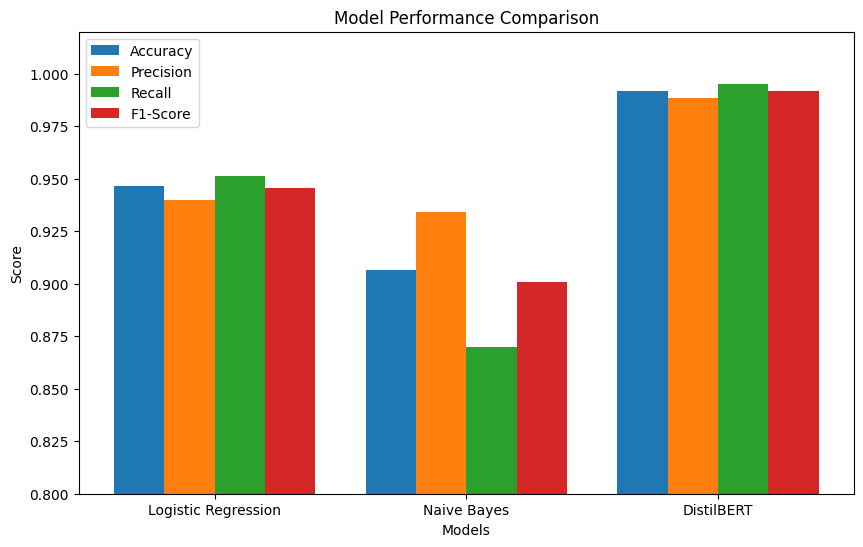

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model names
models = ["Logistic Regression", "Naive Bayes", "DistilBERT"]

# Performance metrics
accuracy = [0.9466, 0.9067, 0.991827]
precision = [0.9401, 0.9343, 0.988599]
recall = [0.9512, 0.8698, 0.995218]
f1_score = [0.9456, 0.9009, 0.991897]

# Create a grouped bar chart
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
values = [accuracy, precision, recall, f1_score]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric
for i, metric in enumerate(metrics):
    ax.bar(x + i*width - width*1.5, values[i], width, label=metric)

# Formatting
ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.ylim(0.8, 1.02)  # Set y-axis limit for better visualization
plt.show()


In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


predictions = trainer.predict(test_dataset)

# Convert logits to predicted class labels
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = np.array(test_dataset['label'])


cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - DistilBERT")
plt.show()


print("Classification Report:\n", classification_report(y_true, y_pred))


KeyboardInterrupt: 

In [13]:
pip install lime torch transformers datasets scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=bb371520246d00d788d3fc562443dcd936d7921b18a39a9bd69e793b9a30e5c6
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [37]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from lime.lime_text import LimeTextExplainer
import torch

# Load DistilBERT Model & Tokenizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2).to(device)

# Prediction Function
def predict_proba(texts):
    inputs = tokenizer(texts, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=1).cpu().numpy()
    return probs


explainer = LimeTextExplainer(class_names=["Real", "Fake"])

# Test Example
sample_text = "The tension between intelligence analysts and political policymakers has always been between honest assessments and desired results, with the latter often overwhelming the former, as in the Iraq War, writes Lawrence Davidson."


exp = explainer.explain_instance(sample_text, predict_proba, num_features=10)

# Explanation
exp.show_in_notebook()


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


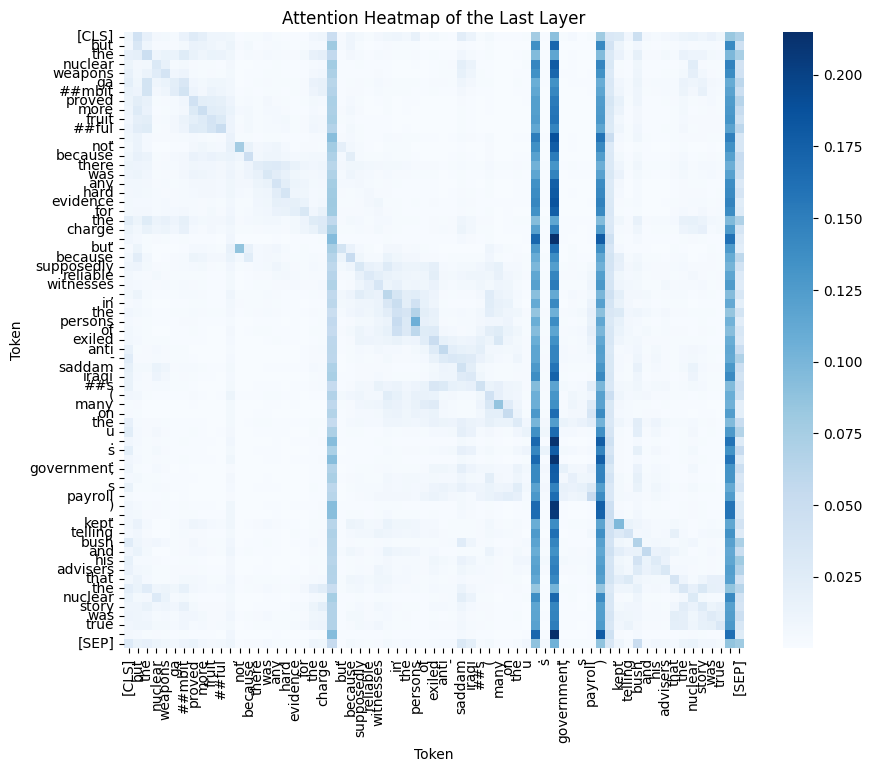

In [39]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_path = '/content/drive/MyDrive/data/fake_news/distilbert_fake_news_model'
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path, output_attentions=True)

# Prepare the text
text = "But the nuclear weapons gambit proved more fruitful, not because there was any hard evidence for the charge, but because supposedly reliable witnesses, in the persons of exiled anti-Saddam Iraqis (many on the U.S. government’s payroll ), kept telling Bush and his advisers that the nuclear story was true."

# Tokenize text and get model's attention weights
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
with torch.no_grad():
    outputs = model(**inputs)


attentions = outputs.attentions
last_layer_attention = attentions[-1]
attention_weights = last_layer_attention.mean(dim=1).squeeze().cpu().numpy()

# tokenized words
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

# Plotting the attention heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(attention_weights, xticklabels=tokens, yticklabels=tokens, cmap='Blues', cbar=True)
plt.title('Attention Heatmap of the Last Layer')
plt.xlabel('Token')
plt.ylabel('Token')
plt.show()
